##### explore notebook--eda and transform
***

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reopening our cleaned dataframe

In [2]:
pd.set_option('display.max_columns', 999) # setting to view all columns

with open('data/data-2.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data_2 = pickle.load(f)
display(data_2.shape)
data_2.head()

(19322, 21)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,Sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,400,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,910,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,0


Dataframe successfully imported from `pickle`.
***

# Reviewing Questions

> Recalling what we want to find out from this dataset:
1. mean price
2. mean price within 20 miles of the city center
3. mean bedrooms of home sales (roomates or rentals)
4. which influences price more: the number of bedrooms or the number of square feet
5. do renovations make a significant difference in such a competitive market

We can answer 2 of our first 3 questions, based on the data we scrubbed in our first notebook. When we initially loaded our data, we described the data set and found a mean price of approximately $ 541,297 for a home in King County. The mean of the number of bedrooms for these properties is 3.37.

Let's describe the data, again, to see how these statistics differ as a result of having processed upper - bound outliers.

In [3]:
# describe statistics for the current state of the data set
display(data_2.describe())

# describe price and bedrooms mean
data_2[['bedrooms', 'price' ]].describe()[1:2].round(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,Sqft_basement,lat,long,sqft_living15,sqft_lot15,Renovated
count,1.932200e+04,19322.000000,1.932200e+04,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000,19322.000000
mean,4.661958e+09,2014.323880,4.825980e+05,3.309388,2.027223,1926.463927,9374.574992,1.478600,0.000155,0.093883,3.410672,7.504089,1674.570024,1970.257323,251.893903,47.560544,-122.220129,1885.700186,8611.002329,0.030690
std,2.874716e+09,0.467967,2.443034e+05,0.850032,0.686233,716.857532,9916.201968,0.538531,0.012460,0.405036,0.650525,1.013602,683.791833,29.540764,378.810943,0.139390,0.136340,575.801836,7177.995122,0.172482
min,1.000102e+06,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,47.155900,-122.502000,460.000000,651.000000,0.000000
25%,2.205900e+09,2014.000000,3.100000e+05,3.000000,1.500000,1380.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,1951.000000,0.000000,47.469800,-122.331000,1460.000000,5000.000000,0.000000
50%,4.023801e+09,2014.000000,4.300000e+05,3.000000,2.000000,1830.000000,7316.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,1973.000000,0.000000,47.572000,-122.244000,1780.000000,7400.000000,0.000000
75%,7.399301e+09,2015.000000,5.950000e+05,4.000000,2.500000,2390.000000,9805.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2070.000000,1996.000000,500.000000,47.680100,-122.137000,2240.000000,9560.750000,0.000000
max,9.900000e+09,2015.000000,2.950000e+06,6.000000,4.250000,4600.000000,130680.000000,3.000000,1.000000,2.000000,5.000000,12.000000,3920.000000,2015.000000,1480.000000,47.777600,-121.315000,3721.000000,54886.000000,1.000000


,bedrooms,price
mean,3.31,482598.03


## Answering __Q1__ & __Q3__

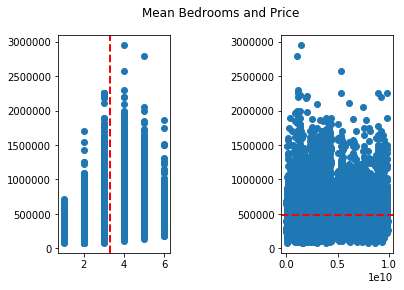

In [4]:
# plot the mean bedroom count and mean price for homes in the data set
fig, (ax1, ax2) = plt.subplots(1, 2) # create the figure
fig.suptitle('Mean Bedrooms and Price') # create a figure title

# plot bedrooms with a dashed line for the mean
ax1.scatter(data_2.bedrooms, data_2.price)
ax1.axvline(np.mean(data_2.bedrooms), color = 'r', linestyle = 'dashed', linewidth = 2)

# plot price with a dashed line for the mean
ax2.scatter(x='id', y='price', data=data_2)
ax2.axhline(np.mean(data_2.price), color = 'r', linestyle = 'dashed', linewidth = 2)

fig.subplots_adjust(wspace=1, hspace=1) # add space between plots

plt.show()

> Mean `price` and `bedrooms`:
* With outliers excluded from the set, the mean price for homes in King County falls nearly 11-percent to __\$ 482,598__.
The mean of bedrooms for the new sample is approximately __3.31__.
Property taxes and insurance would put that at about \$ 1000 per - month, per room.

For the record, we are looking at more than nineteen - thousand of homes, with most of their sale values close to 350K and a couple of over - achievers approaching 3 million.

# Exploring Correlation with `price`

Another question we have is which feature influences the price of these homes more, between the number of `bedrooms` and the number of square feet (of living space). Ultimately, that will be a question to answer with our linear regression model. In the meantime, we can use a correlations table to see which of the two features appears to have the stronget relationship with price.

There currently are two variables associated with living - space square footage, `sqft_living` and `sqft_living15`. See which has a stronger correlation with price will can show us which of these makes more sense to consider in our analysis of this data set.

In [5]:
# viewing a kitchen sink of correlations
df_corr = data_2.corr()
df_corr

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,Sqft_basement,lat,long,sqft_living15,sqft_lot15,Renovated
id,1.000000,0.007910,-0.001003,0.004598,0.026777,0.018684,-0.105266,0.026203,0.008069,0.021286,-0.028792,0.034606,0.022823,0.034597,-0.005840,-0.009261,0.055551,0.020821,-0.092070,-0.011854
date,0.007910,1.000000,0.009738,-0.006395,-0.028182,-0.029159,-0.011846,-0.022196,-0.008625,0.009416,-0.047092,-0.034326,-0.023216,0.003492,-0.013273,-0.030673,-0.002569,-0.020486,-0.008582,-0.016069
price,-0.001003,0.009738,1.000000,0.290800,0.434373,0.609295,0.070791,0.270389,0.024650,0.200093,0.054149,0.618932,0.513087,0.016042,0.226851,0.413889,0.010399,0.522174,0.070960,0.105261
bedrooms,0.004598,-0.006395,0.290800,1.000000,0.491025,0.611205,0.109847,0.168740,-0.009423,0.036044,0.028922,0.335893,0.489717,0.163464,0.272649,-0.036622,0.143168,0.396105,0.120807,0.010425
bathrooms,0.026777,-0.028182,0.434373,0.491025,1.000000,0.709376,0.036630,0.520187,0.002532,0.071480,-0.130666,0.613053,0.627186,0.542578,0.210283,-0.000954,0.230994,0.521751,0.045240,0.030984
sqft_living,0.018684,-0.029159,0.609295,0.611205,0.709376,1.000000,0.202151,0.366256,0.006378,0.129183,-0.060647,0.699486,0.854743,0.334759,0.349491,0.033682,0.250404,0.729739,0.220755,0.037033
sqft_lot,-0.105266,-0.011846,0.070791,0.109847,0.036630,0.202151,1.000000,-0.121772,0.019735,0.024076,0.041943,0.110850,0.195438,0.016316,0.029763,-0.061206,0.269196,0.255646,0.809436,0.006567
floors,0.026203,-0.022196,0.270389,0.168740,0.520187,0.366256,-0.121772,1.000000,0.000495,-0.007517,-0.268026,0.472663,0.542565,0.504178,-0.286285,0.037467,0.126038,0.276593,-0.132442,-0.000451
waterfront,0.008069,-0.008625,0.024650,-0.009423,0.002532,0.006378,0.019735,0.000495,1.000000,0.058646,0.011289,0.010195,0.000099,-0.009530,0.011890,-0.006727,-0.008214,0.005504,0.007503,0.021866
view,0.021286,0.009416,0.200093,0.036044,0.071480,0.129183,0.024076,-0.007517,0.058646,1.000000,0.035759,0.110132,0.049671,-0.073804,0.154804,0.015593,-0.080293,0.147265,0.010491,0.038026


Well, that is not much fun to look at. Let's view this as a heatmap.

### Viewing correlation data in plots

This should be easier to look at:

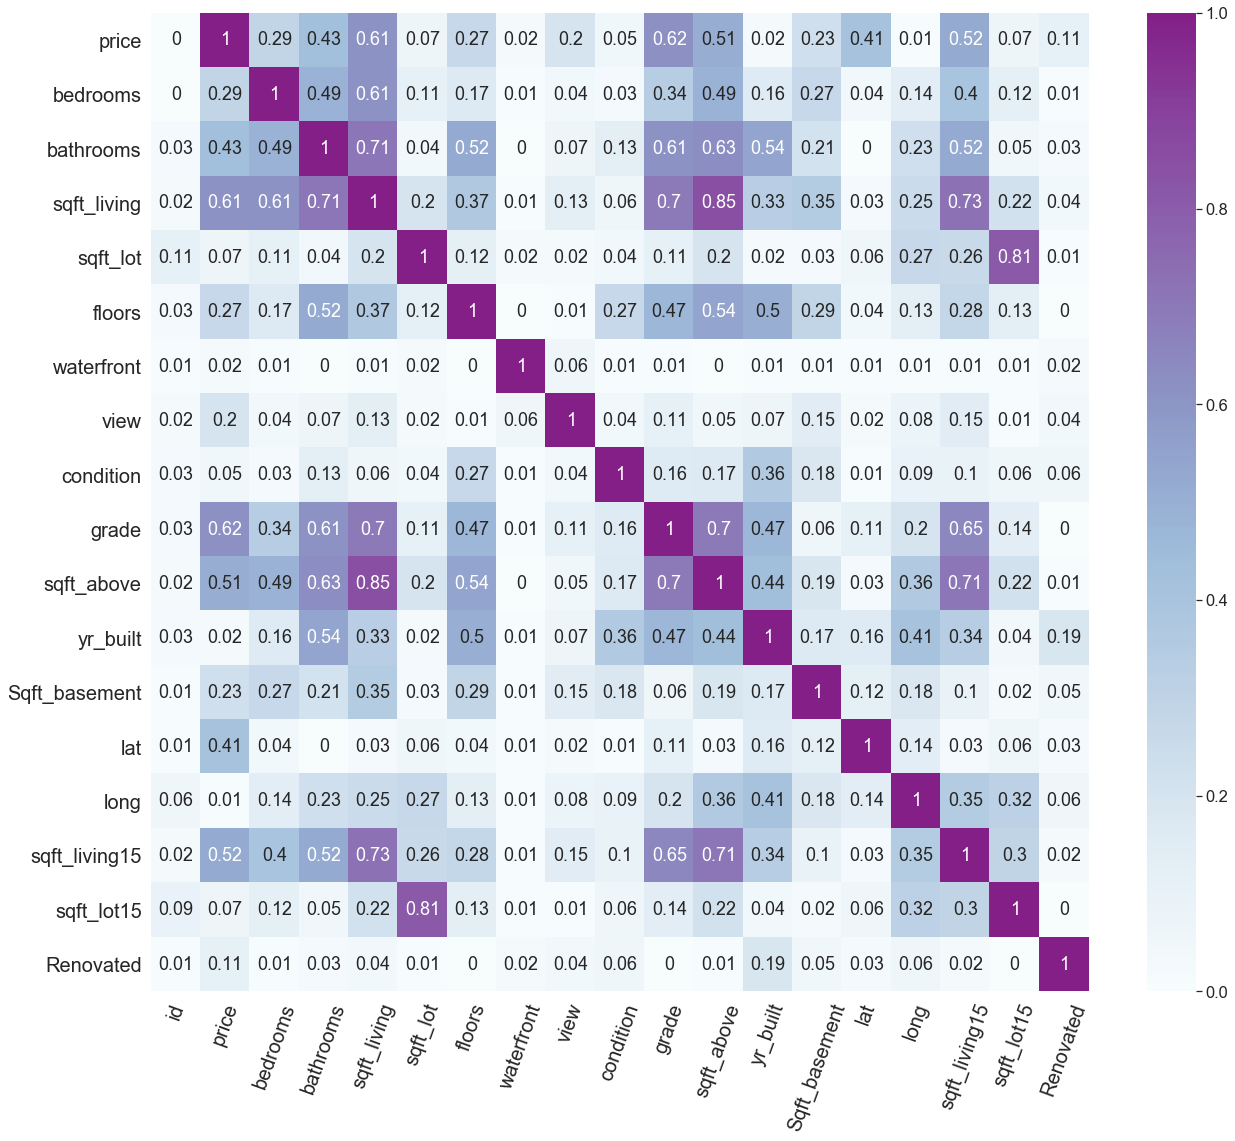

In [6]:
# assign a variable for correlation without the `date` column
corr_2 = data_2.drop('date', axis=1).corr() 

# create a function to generate a heatmap
def plot_corr_heatmap(cor, cmap="BuPu"):
    # creating a figure to plot a heatmap from `data_2` correlations
    plt.figure(figsize=(21,18))
    sns.set(font_scale=1.5, color_codes=True) # making annotations legible
    # plotting
    sns.heatmap(cor.round(2).drop(['id']).abs(), center=.6, annot=True, cmap="BuPu")
    plt.xticks(rotation = 70, fontsize=20)
    plt.yticks(fontsize=20)
    plt.autoscale()
    plt.show()

plot_corr_heatmap(corr_2)

## Answering __Q4__
### Influence over `price`
> Darker colors in the `price` column or row are worth noting:
* The leaders are: `grade` (.62), `sqft_living` (.61), `sqft_living15`(.52), and , `sqft_above`(.51).
    * Square feet features are strong, out of the gate. Multicollinearity can be expected, however, for the three noted above. The living - space variables appear redundant. In addition, we  know that `sqft_above` can be computed as a subset of `sqft_living`.
* The number of bathrooms has what might initially seem to be a surprising edge over bedrooms, but I suppose that is to be expected in homes with larger living and entertainment spaces.
* On the other hand, renovations appear to have a notably low influence over price. Again, there may be simple explanations. Even before taking data normalization into consideration, I can imagine a fair number of homeowners either renovating just to catch - up with the rising housing market or not bothering to renovate, since prices are still high.
* `yr_built` is unpursuasive, while `sqft_lot` and `sqft_lot15` barely make a dent.

So, as far as correlations inform us at this stage, __`sqft_living` (.61) has a much stronger relationship to the `price` target variable than `bedrooms` (.29)__.

Beyond this answer, we have learned that we can reasonably eliminate a few features from our analysis.

## Eliminating Features 
> We can let go of a few predictor variables:
* The feature `yr_built` is irredeemable.
* `sqft_lot15` is unimpressive and redundant with `sqft_lot`
* `sqft_above` is no longer necessary.

We will hold on to `sqft_lot`, for the moment, and inspect whether it is collinear with other features.

### Dropping unneeded columns

In [7]:
# removing the `yr_built`, `sqft_lot15`, and 'sqft_above' columns
data_2.drop(['yr_built', 'sqft_lot15', 'sqft_above'], axis=1, inplace=True)

In [8]:
# viewing remaining columns
data_2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'Sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'Renovated'],
      dtype='object')

### Viewing Univariate Distributions

Lets view each feature on its own.

#### Histograms

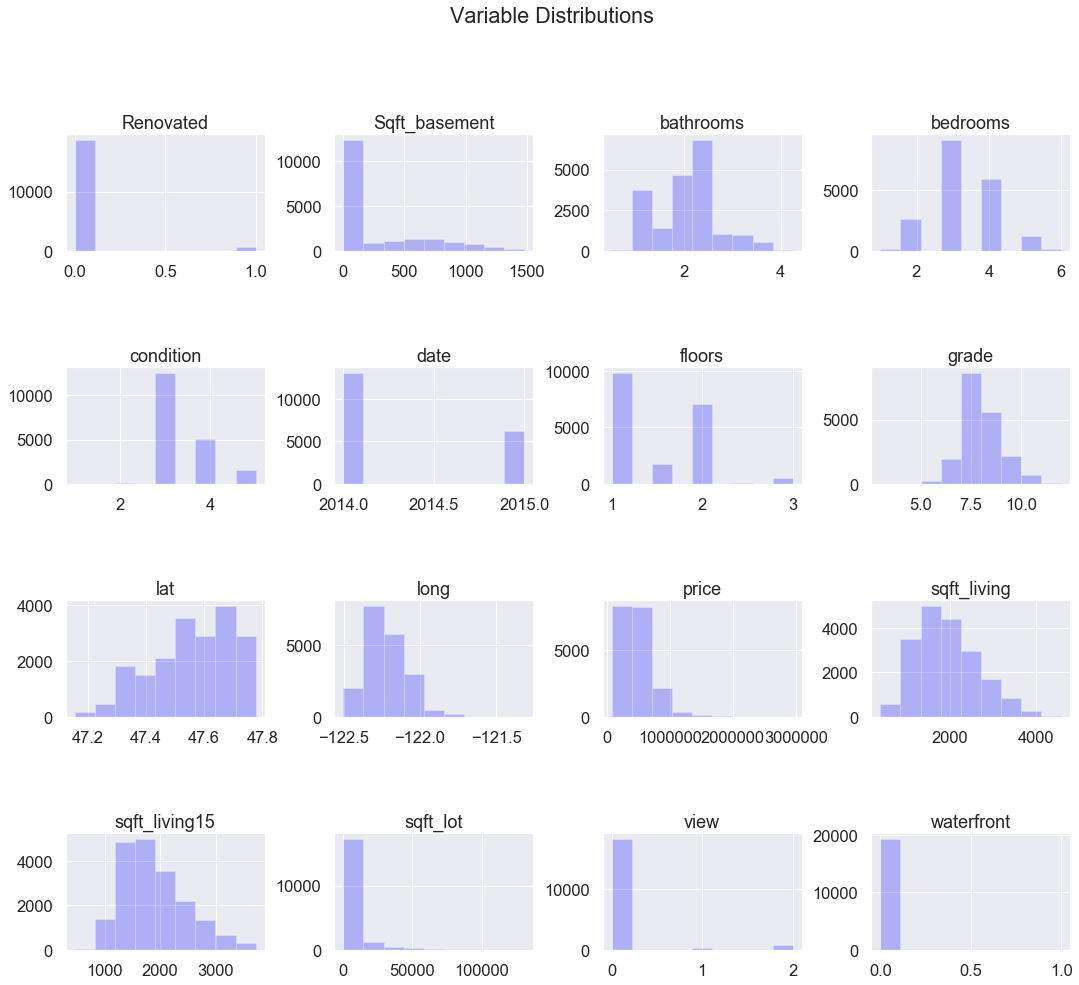

In [9]:
# selecting plot styling
plt.style.use('seaborn')
sns.set(font_scale=1.5)  # making labels legible

# plotting select columns in matplotlib without kde
data_2.hist(figsize=(18, 15), bins=9,
            column=[col for col in data_2.drop(['id'], axis=1).columns],
            alpha=.25, color='blue')  # Plot specific columns

plt.subplots_adjust(wspace=.35, hspace=1)
plt.suptitle('Variable Distributions', va='bottom')
plt.show()

* We can observe positive skew in the `sqft` variables, but these are counts of unique values rather than binomial distribution residuals. At this point, we are still getting to know our data.
* `sqft_living`, and `sqft_living15` could almost be distortions of the same plot. We can eliminate the latter.

### Dropping another unneeded column

In [10]:
# removing the `sqft_living15` column
data_2.drop(['sqft_living15'], axis=1, inplace=True)

# While date could be informative, if we were comparing 
# property resales over time, that is not in our scope

# removing the `date` feature
data_2.drop(['date'], axis=1, inplace=True)

In [11]:
# viewing remaining columns
data_2.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'Sqft_basement',
       'zipcode', 'lat', 'long', 'Renovated'],
      dtype='object')

***
Minimizing collinearity among predictor variables is a step toward satisfying assumptions for linear regression.

## Assumptions for Linear Regression

- Linearity between target and predictor variables
    - Previewed above, but the scales may be a bit unbalanced, yet
- Normality of model residuals
    - Verify after building a baseline model
- Homoscedasticity: equal variability of a dependent variable across the values of an independent variable
    - Review after normalizing data
- Absence of, or minimal, multicollinearity
    - We will need to select the best and discard the rest from multicollinear variables 

## Normality - Skew

We can compute skew and kurtosis present in our features.

In [12]:
for col in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'Sqft_basement']:
    print (f"\nSkew in {col}:", data_2[col].skew().round(3))
    print (f"Kurtosis in {col}:", data_2[col].kurtosis().round(3))
    print ("="*30)


Skew in bedrooms: 0.258
Kurtosis in bedrooms: 0.34

Skew in bathrooms: 0.037
Kurtosis in bathrooms: -0.528

Skew in sqft_living: 0.594
Kurtosis in sqft_living: -0.055

Skew in sqft_lot: 4.718
Kurtosis in sqft_lot: 31.589

Skew in floors: 0.674
Kurtosis in floors: -0.425

Skew in Sqft_basement: 1.261
Kurtosis in Sqft_basement: 0.325


The `sqft_lot` variable is off the rails, but that simply means that most homes are situated on smaller lots. That is to be expected, near a metropolitan area. As this is a valid characteristic, I will not yet drop more outliers.

## Checking for Linearity

Let's see how independent variables relate to our target.

### Reviewing plots of predictor variables against the target


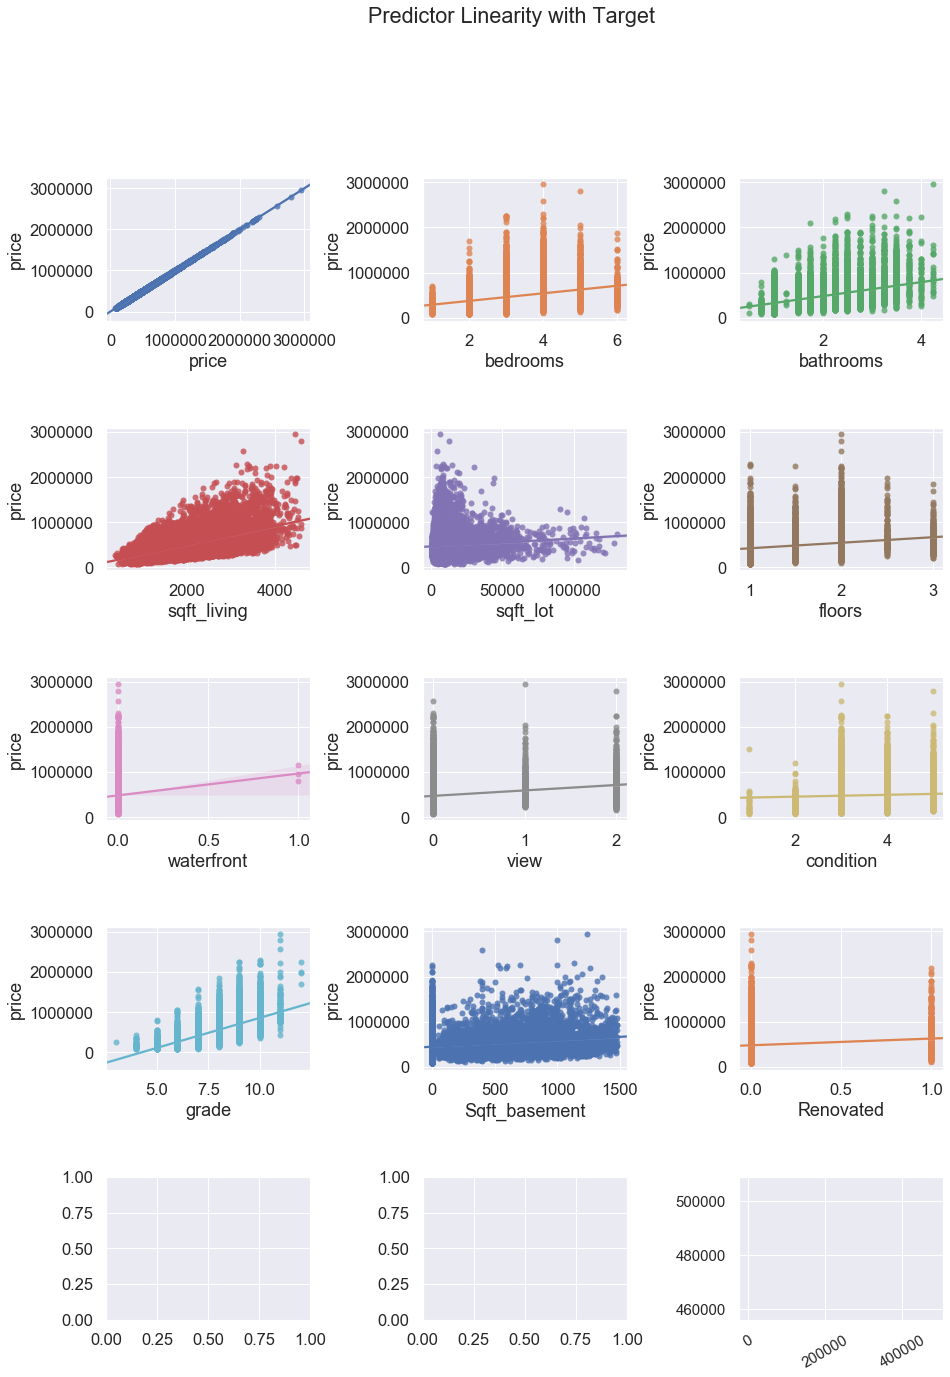

In [13]:
# selecting plot style
plt.style.use('seaborn')
sns.set(font_scale=1.5); # preventing overlap of long column names

# selecting and excluding columns
columns = data_2.drop(['id', 'zipcode', 'lat', 'long'], axis=1).columns

# setting a figure and number of axes to plot
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(15, 21))
plt.subplots_adjust(wspace=.55, hspace=.75) # space between subplots
plt.suptitle("Predictor Linearity with Target", va='bottom')

plt.xticks(rotation = 30, fontsize=15)
plt.yticks(fontsize=15)

# flattening the list of axes and enumerating to associate each
# axis with the dataframe column in the same index position
for index, a in enumerate(ax.flatten()):
    if index < 12: # avoid error of indexes exceeding axes
        column = columns[index]
        # plot in seaborn including kde
        a = sns.regplot(data=data_2, x=data_2[column], y='price', ax=a)

plt.show()

We see many positive indicators among the variables. The regression line for `waterfront` against `price` looks almost as steep as the line for `grade`. Then again ...

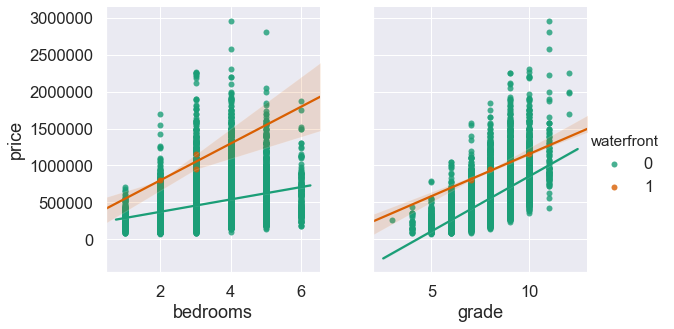

In [14]:
custom_palette = sns.color_palette("Dark2")
sns.pairplot(data_2, x_vars=["bedrooms", "grade"], y_vars=["price"],
             hue="waterfront", palette=custom_palette, height=5, aspect=.8, kind="reg");

A spot on the waterfront comes at enough of a premium that it can significantly influence many other variables.

In [15]:
# how many waterfront properties
data_2.loc[data_2['waterfront'] == 1, ['id']].count()

id    3
dtype: int64

There are only 3 properties on the waterfront, in this set of more than 19,000. I am not concerned about it, at this time.

> Overall:
* We observe some linearity, and there are also many signs of heteroscedsticity, which would violate our assumptions for linear regression
* `Renovated`, and `condition` look fairly weak as indicators.

Since we know most home prices are below \\$250,000, let's plot the mean value of homes below that amount, based on whether or not the homes were renovated.

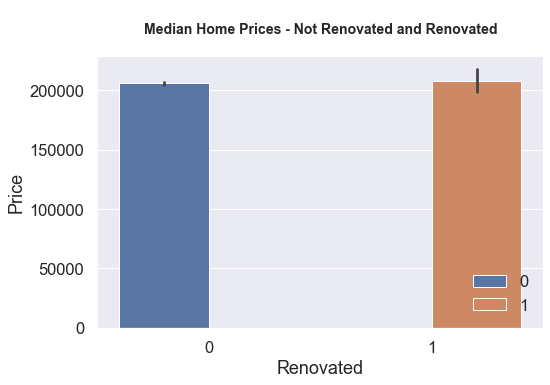

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Renovated', y='price', hue='Renovated', data=data_2[data_2['price'] < 250000])

# add title, legend and informative axis labels
ax.set_title('\nMedian Home Prices - Not Renovated and Renovated\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Price', xlabel='Renovated')
ax.legend(loc=4);

There is not much difference, there.

What about condition, for homes below the same value?

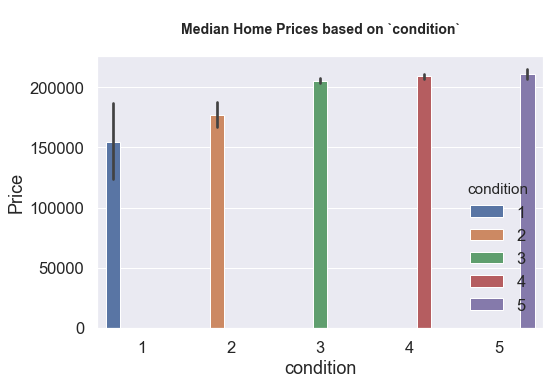

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='condition', y='price', hue='condition', 
            data=data_2[data_2['price'] < 250000])

# add title, legend and informative axis labels
ax.set_title('\nMedian Home Prices based on `condition`\n', 
             fontsize=14, fontweight='bold')
ax.set(ylabel='Price', xlabel='condition');

## Answering Q5

Though we are retaining the feature for analysis in our model, it seems safe to conclude that renovations do not significantly influence price.

Time to save the dataframe in its current state and move on to modeling.

## Pickle the current - state dataframe

Store the `data_2` dataframe in a sub - directory of the repository as `data_drops`.

In [18]:
with open('data/data-drops.pickle', 'wb') as f:
    # Pickling the 'data_2' dataframe using the highest protocol available.
    pickle.dump(data_2, f, pickle.HIGHEST_PROTOCOL)

### Continue to the next notebook



* Model and conclude

![encap graphic of ](images/endcap-n2.png)

# Notes
***

## Parking Lot

In [19]:
# import gc
# gc.get_count()
# gc.collect()
# gc.get_count()